# Multiple Linear Regression Analysis

In [3]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("cars.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)

[107.2087328]


C:\Users\Pankaj Agarwal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
Print the coefficient values of the regression object

In [5]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("cars.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[0.00755095 0.00780526]


In [ ]:
Copy the example from before, but change the weight from 2300 to 3300:

In [6]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("cars.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

predictedCO2 = regr.predict([[3300, 1300]])

print(predictedCO2)

[114.75968007]


C:\Users\Pankaj Agarwal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


We have predicted that a car with 1.3 liter engine, and a weight of 3300 kg, will release approximately 115 grams of CO2 for every kilometer it drives.

Which shows that the coefficient of 0.00755095 is correct:

107.2087328 + (1000 * 0.00755095) = 114.75968

# Gredient Descent Algorithm

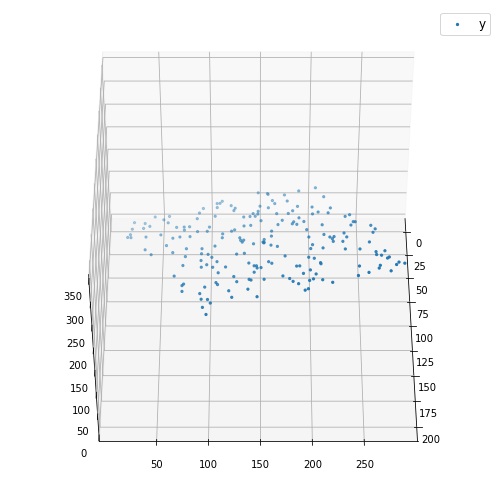

In [7]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 
def generate_dataset(n):
    x = []
    y = []
    random_x1 = np.random.rand()
    random_x2 = np.random.rand()
    for i in range(n):
        x1 = i
        x2 = i/2 + np.random.rand()*n
        x.append([1, x1, x2])
        y.append(random_x1 * x1 + random_x2 * x2 + 1)
    return np.array(x), np.array(y)
 
x, y = generate_dataset(200)
 
mpl.rcParams['legend.fontsize'] = 12
 
fig = plt.figure()
ax = fig.add_subplot(projection ='3d')
 
ax.scatter(x[:, 1], x[:, 2], y, label ='y', s = 5)
ax.legend()
ax.view_init(45, 0)
 
plt.show()

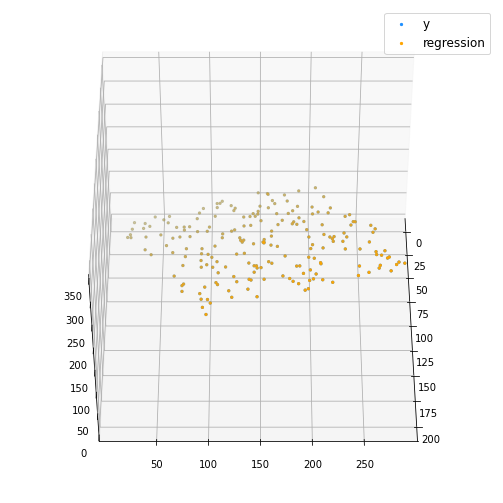

In [8]:
def mse(coef, x, y):
    return np.mean((np.dot(x, coef) - y)**2)/2
 
def gradients(coef, x, y):
    return np.mean(x.transpose()*(np.dot(x, coef) - y), axis=1)
 
def multilinear_regression(coef, x, y, lr, b1=0.9, b2=0.999, epsilon=1e-8):
    prev_error = 0
    m_coef = np.zeros(coef.shape)
    v_coef = np.zeros(coef.shape)
    moment_m_coef = np.zeros(coef.shape)
    moment_v_coef = np.zeros(coef.shape)
    t = 0
 
    while True:
        error = mse(coef, x, y)
        if abs(error - prev_error) <= epsilon:
            break
        prev_error = error
        grad = gradients(coef, x, y)
        t += 1
        m_coef = b1 * m_coef + (1-b1)*grad
        v_coef = b2 * v_coef + (1-b2)*grad**2
        moment_m_coef = m_coef / (1-b1**t)
        moment_v_coef = v_coef / (1-b2**t)
 
        delta = ((lr / moment_v_coef**0.5 + 1e-8) *
                 (b1 * moment_m_coef + (1-b1)*grad/(1-b1**t)))
 
        coef = np.subtract(coef, delta)
    return coef
 
 
coef = np.array([0, 0, 0])
c = multilinear_regression(coef, x, y, 1e-1)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
 
ax.scatter(x[:, 1], x[:, 2], y, label='y',
           s=5, color="dodgerblue")
 
ax.scatter(x[:, 1], x[:, 2], c[0] + c[1]*x[:, 1] + c[2]*x[:, 2],
           label='regression', s=5, color="orange")
 
ax.view_init(45, 0)
ax.legend()
plt.show()

Iteration 1: Cost 4352.088931274409, Weight         0.7593291142562117, Bias 0.02288558130709
Iteration 2: Cost 1114.8561474350017, Weight         1.081602958862324, Bias 0.02918014748569513
Iteration 3: Cost 341.42912086804455, Weight         1.2391274084945083, Bias 0.03225308846928192
Iteration 4: Cost 156.64495290904443, Weight         1.3161239281746984, Bias 0.03375132986012604
Iteration 5: Cost 112.49704004742098, Weight         1.3537591652024805, Bias 0.034479873154934775
Iteration 6: Cost 101.9493925395456, Weight         1.3721549833978113, Bias 0.034832195392868505
Iteration 7: Cost 99.4293893333546, Weight         1.3811467575154601, Bias 0.03500062439068245
Iteration 8: Cost 98.82731958262897, Weight         1.3855419247507244, Bias 0.03507916814736111
Iteration 9: Cost 98.68347500997261, Weight         1.3876903144657764, Bias 0.035113776874486774
Iteration 10: Cost 98.64910780902792, Weight         1.3887405007983562, Bias 0.035126910596389935
Iteration 11: Cost 98.6408

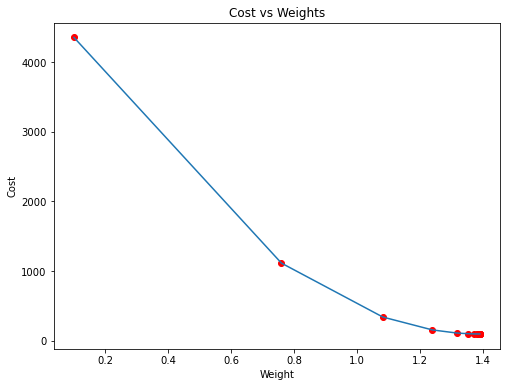

Estimated Weight: 1.389738813163012
Estimated Bias: 0.03509461674147458


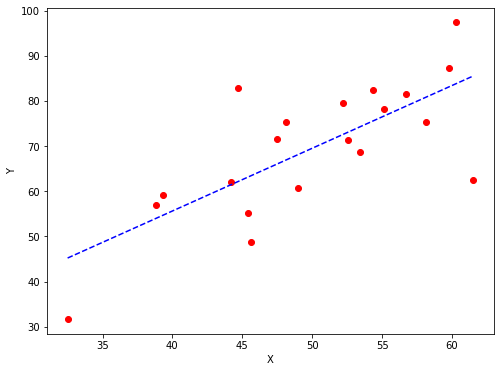

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
 
def mean_squared_error(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost
 
# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001, 
                     stopping_threshold = 1e-6):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters 
    for i in range(iterations):
         
        # Making predictions
        y_predicted = (current_weight * x) + current_bias
         
        # Calculating the current cost
        current_cost = mean_squared_error(y, y_predicted)
 
        # If the change in cost is less than or equal to 
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
                 
        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")
     
     
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return current_weight, current_bias
 
 
def main():
     
    # Data
    X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
           55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
           45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
           48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
    Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
           78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
           55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
           60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])
 
    # Estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")
 
    # Making predictions using estimated parameters
    Y_pred = estimated_weight*X + estimated_bias
 
    # Plotting the regression line
    plt.figure(figsize = (8,6))
    plt.scatter(X, Y, marker='o', color='red')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
             markersize=10,linestyle='dashed')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
 
     
if __name__=="__main__":
    main()

#Gradient Descent for Linear Regression:
Consider a linear regression problem with one feature (x) and one target variable (y). The goal is to fit a linear model y=θ0+θ1*x to the data.


In [2]:
import numpy as np

# Generating a small dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
# Function to perform gradient descent
def gradient_descent(X, y, learning_rate, n_iterations):
    m = len(X)
    theta = np.random.randn(2, 1)  # Initializing parameters randomly
    X_b = np.c_[np.ones((m, 1)), X]  # Adding a bias term (x0 = 1) to the feature matrix

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - learning_rate * gradients

    return theta

# Set hyperparameters
learning_rate = 0.1
n_iterations = 1000

# Apply gradient descent
theta = gradient_descent(X, y, learning_rate, n_iterations)

print("Theta values after gradient descent:", theta)

Theta values after gradient descent: [[4.21509616]
 [2.77011339]]


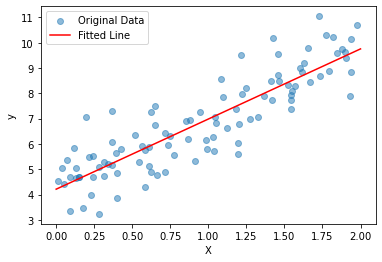

In [4]:
#Visualizing the Results:
import matplotlib.pyplot as plt

# Plotting the dataset
plt.scatter(X, y, alpha=0.5, label='Original Data')

# Plotting the fitted line
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)
plt.plot(X_new, y_predict, 'r-', label='Fitted Line')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Polynomial Regression Analysis

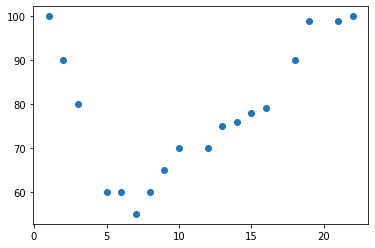

In [5]:
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show()

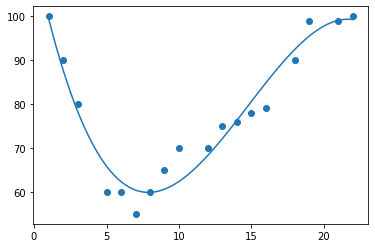

In [7]:
import numpy
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [8]:
import numpy
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.9432150416451026


In [ ]:
# Predict Future Values

Now we can use the information we have gathered to predict future values.

Example: Let us try to predict the speed of a car that passes the tollbooth at around the time 17:00:

To do so, we need the same mymodel array from the example above:

In [9]:
speed = mymodel(17)
print(speed)

88.87331269697998


The example predicted a speed to be 88.87, which we also could read from the diagram:

# Bad Fit?

Let us create an example where polynomial regression would not be the best method to predict future values.

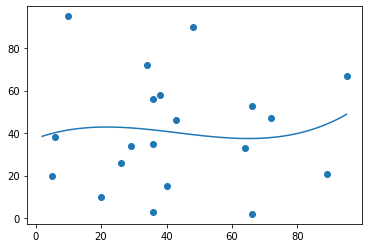

In [10]:
import numpy
import matplotlib.pyplot as plt

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(2, 95, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [11]:
import numpy
from sklearn.metrics import r2_score

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.009952707566680652


## Polynomial Regression

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
# Importing the dataset
datas = pd.read_csv('polydata.csv')
datas

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [13]:
X = datas.iloc[:, 1:2].values
y = datas.iloc[:, 2].values

In [14]:
# Features and the target variables
X = datas.iloc[:, 1:2].values
y = datas.iloc[:, 2].values
 
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
 
lin.fit(X, y)

LinearRegression()

Fitting the Polynomial Regression model on two components X and y. 

In [15]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

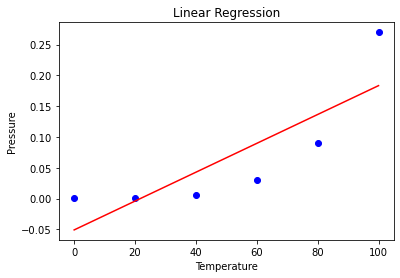

In [16]:
# Visualising the Linear Regression results
plt.scatter(X, y, color='blue')
 
plt.plot(X, lin.predict(X), color='red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
 
plt.show()

Text(0, 0.5, 'Pressure')

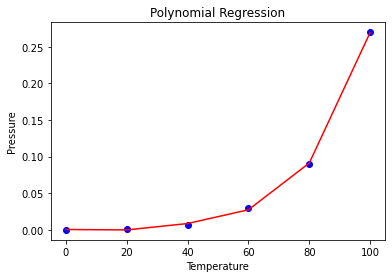

In [17]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color='blue')
 
plt.plot(X, lin2.predict(poly.fit_transform(X)),
         color='red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
 

Predict new results with both Linear and Polynomial Regression. Note that the input variable must be in a Numpy 2D array.

In [18]:
# Predicting a new result with Linear Regression
# after converting predict variable to 2D array
pred = 110.0
predarray = np.array([[pred]])
lin.predict(predarray)

array([0.20675333])